In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from PIL import Image
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

male_images = []
female_images = []

image_width = 120
image_height = 120
BATCH_SIZE = 32



2024-04-13 17:13:31.534711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [2]:
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('dataset/Gender',
                                              target_size=(image_width, image_height),
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('dataset',
                                                   target_size=(image_width, image_height),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   subset='validation')

Found 1847 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


2024-04-13 17:13:36.865527: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [4]:
# This part trains the AI Model with Gender Folder Having the male and female Images
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32)


Epoch 1/10


2024-04-13 17:13:37.880881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


57/57 [==============================] - ETA: 0s - loss: 0.6494 - accuracy: 0.6050

2024-04-13 17:14:37.168589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


57/57 [==============================] - 64s 1s/step - loss: 0.6494 - accuracy: 0.6050 - val_loss: 0.4625 - val_accuracy: 0.8167
Epoch 2/10
57/57 [==============================] - 55s 955ms/step - loss: 0.4627 - accuracy: 0.7912 - val_loss: 0.3794 - val_accuracy: 0.8458
Epoch 3/10
57/57 [==============================] - 61s 1s/step - loss: 0.3533 - accuracy: 0.8347 - val_loss: 0.2133 - val_accuracy: 0.9146
Epoch 4/10
57/57 [==============================] - 62s 1s/step - loss: 0.2974 - accuracy: 0.8843 - val_loss: 0.2643 - val_accuracy: 0.9021
Epoch 5/10
57/57 [==============================] - 56s 979ms/step - loss: 0.2691 - accuracy: 0.8860 - val_loss: 0.4795 - val_accuracy: 0.7917
Epoch 6/10
57/57 [==============================] - 52s 913ms/step - loss: 0.2284 - accuracy: 0.8981 - val_loss: 0.2615 - val_accuracy: 0.9083
Epoch 7/10
57/57 [==============================] - 56s 977ms/step - loss: 0.2167 - accuracy: 0.9102 - val_loss: 0.2935 - val_accuracy: 0.8896
Epoch 8/10
57/57 [=

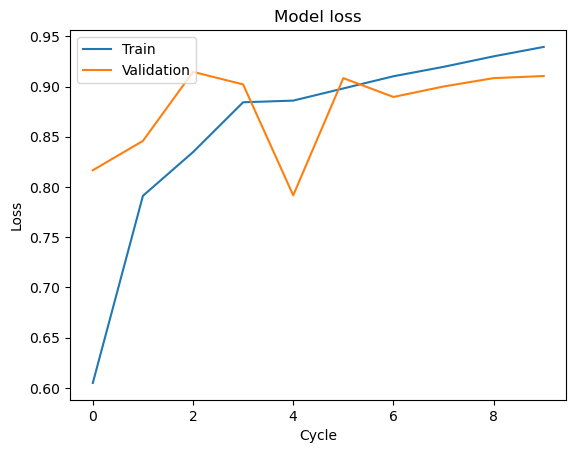

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Cycle')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Cycle')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [6]:
# This code takes new dataset and provide the prediction based on what it has been trained on.
# It also puts all detected images, into an array which can be be displayed in a tabular manner 

import os
import numpy as np
from tensorflow.keras.preprocessing import image

folder_path = 'dataset/images'

image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

data = []

for img_path in image_files:
    img_name = os.path.basename(img_path)  # Extracting image name from the path
    img = image.load_img(img_path, target_size=(image_width, image_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    female = 'yes' if prediction[0][0] >= 0.5 else 'no'
    male = 'yes' if prediction[0][0] < 0.5 else 'no'

    data.append([img_path, img_name, female, male])

df = pd.DataFrame(data, columns=['Image Path', 'Image Name', 'Female (yes/no)', 'Male (yes/no)'])

print(df)
#     prediction = model.predict(img_array)
#     if prediction[0][0] >= 0.5:
#         print(f"{img_path}: The Image has a Female Face")
#     else:
#         print(f"{img_path}: The Image has a Male Face")

1/1 [==============================] - 0s 76ms/step
                    Image Path  Image Name Female (yes/no) Male (yes/no)
0    dataset/images/000005.jpg  000005.jpg              no           yes
1    dataset/images/000008.jpg  000008.jpg             yes            no
2    dataset/images/000086.jpg  000086.jpg              no           yes
3    dataset/images/000033.jpg  000033.jpg              no           yes
4    dataset/images/000083.jpg  000083.jpg             yes            no
..                         ...         ...             ...           ...
100  dataset/images/000052.jpg  000052.jpg              no           yes
101  dataset/images/000035.jpg  000035.jpg              no           yes
102  dataset/images/000024.jpg  000024.jpg              no           yes
103  dataset/images/000092.jpg  000092.jpg              no           yes
104  dataset/images/000067.jpg  000067.jpg              no           yes

[105 rows x 4 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

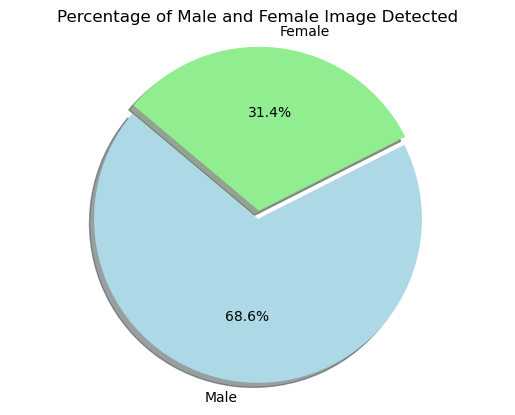

In [7]:
males_count = df['Male (yes/no)'].value_counts()['yes']
females_count = df['Female (yes/no)'].value_counts()['yes']

labels = ['Male', 'Female']
sizes = [males_count, females_count]
colors = ['lightblue', 'lightgreen']
explode = (0.05,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage of Male and Female Image Detected')
plt.show



In [8]:
from IPython.display import display

display(df)

,Image Path,Image Name,Female (yes/no),Male (yes/no)
0,dataset/images/000005.jpg,000005.jpg,no,yes
1,dataset/images/000008.jpg,000008.jpg,yes,no
2,dataset/images/000086.jpg,000086.jpg,no,yes
3,dataset/images/000033.jpg,000033.jpg,no,yes
4,dataset/images/000083.jpg,000083.jpg,yes,no
...,...,...,...,...
100,dataset/images/000052.jpg,000052.jpg,no,yes
101,dataset/images/000035.jpg,000035.jpg,no,yes
102,dataset/images/000024.jpg,000024.jpg,no,yes
103,dataset/images/000092.jpg,000092.jpg,no,yes


In [9]:
print(df.head())

                  Image Path  Image Name Female (yes/no) Male (yes/no)
0  dataset/images/000005.jpg  000005.jpg              no           yes
1  dataset/images/000008.jpg  000008.jpg             yes            no
2  dataset/images/000086.jpg  000086.jpg              no           yes
3  dataset/images/000033.jpg  000033.jpg              no           yes
4  dataset/images/000083.jpg  000083.jpg             yes            no


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Image Path       105 non-null    object
 1   Image Name       105 non-null    object
 2   Female (yes/no)  105 non-null    object
 3   Male (yes/no)    105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB
None


In [11]:
print(df.describe())

                       Image Path  Image Name Female (yes/no) Male (yes/no)
count                         105         105             105           105
unique                        105         105               2             2
top     dataset/images/000005.jpg  000005.jpg              no           yes
freq                            1           1              72            72


In [13]:
df.to_csv('Gender_Image_Identification.csv', index=False)

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
df.to_csv('Gender_Image_Identification.csv', index=False)